In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# split: train 0.8 / test 0.2

In [26]:
# model which gets regularized by doc2vec vectors from movie subtitles
# si = side information
si_log = pd.read_csv('data/results/2016-04-17_13.36.53_si_e50_no-val_log.csv')

# standard model is MPCFs from Kabbur's PhD thesis
# https://conservancy.umn.edu/bitstream/handle/11299/171241/Kabbur_umn_0130E_15806.pdf?sequence=1&isAllowed=y
nosi_log = pd.read_csv('data/results/2016-04-17_19.25.49_no-si_e50_no-val_log.csv')
nosi_e200_log = pd.read_csv('data/results/2016-04-14_00.34.05_no-si_kabbur-best_e200_log.csv')

In [3]:
si_log.head()

,auc,nb_movies_not_rated,nb_test_movies,nb_train_movies,rankings,user_id
0,0.852861,2963,10,42,"[[14, 64, 91, 122, 206, 255, 274, 576, 577, 22...",1
1,0.751230,2902,26,103,"[[14, 49, 57, 72, 148, 186, 199, 221, 313, 328...",2
2,0.810731,2987,5,18,"[[32, 35, 107, 894, 1779]]",12
3,0.600214,2845,40,160,"[[93, 137, 203, 236, 248, 430, 490, 511, 520, ...",15
4,0.681471,2839,41,166,"[[10, 25, 35, 82, 156, 186, 192, 226, 250, 253...",17


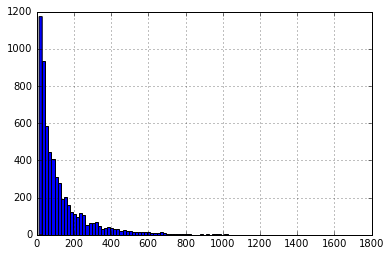

In [24]:
si_log['nb_train_movies'].hist(bins=100)

In [25]:
print "max number of ratings:", si_log['nb_train_movies'].max()
print "min number of ratings:", si_log['nb_train_movies'].min()

max number of ratings: 1674
min number of ratings: 13


In [4]:
print "avg AUC for side info model (50 epochs):", si_log['auc'].mean()
print "avg AUC for standard model (50 epochs):", nosi_log['auc'].mean()
print "avg AUC for standard model (200 epochs):", nosi_e200_log['auc'].mean()

avg AUC for side info model (50 epochs): 0.673671180409
avg AUC for standard model (50 epochs): 0.671073591729
avg AUC for standard model (200 epochs): 0.694669033598


In [5]:
def get_auc_per_group(df, step=5):
    results = []
    max_nb_ratings = df['nb_train_movies'].max()
    start = 0
    while start < max_nb_ratings:
        end = start + step
        mask = (df['nb_train_movies'] >= start) & (df['nb_train_movies'] < end)
        results.append(df.loc[mask]['auc'].mean())
        start += step
    return results

In [6]:
nosi_results = get_auc_per_group(nosi_log)

In [7]:
si_results = get_auc_per_group(si_log)

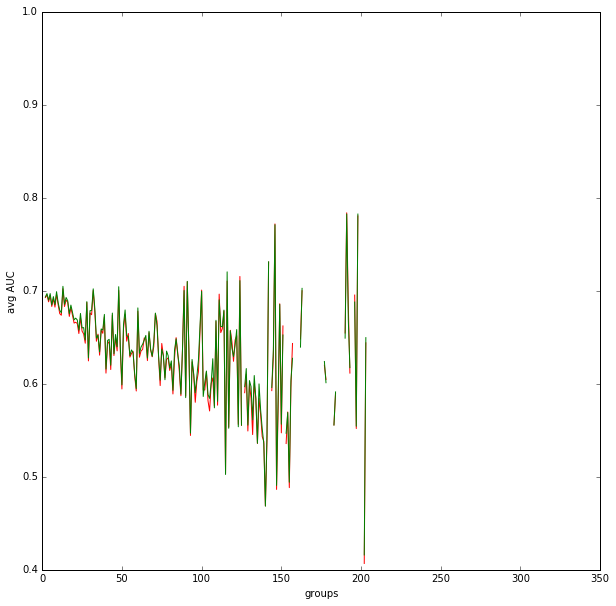

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_ylabel('avg AUC')
ax.set_xlabel('groups')
ax.plot(xrange(len(nosi_results)),nosi_results, 'r', xrange(len(si_results)), si_results, 'g')

green: Side information model

red: Standard model

Group 0: avg AUC of users who have 0-5 training ratings

Group 1: avg AUC of users who have 5-10 training ratings

Side information model seems slightly better

In [9]:
nosi_e200_results = get_auc_per_group(nosi_e200_log)

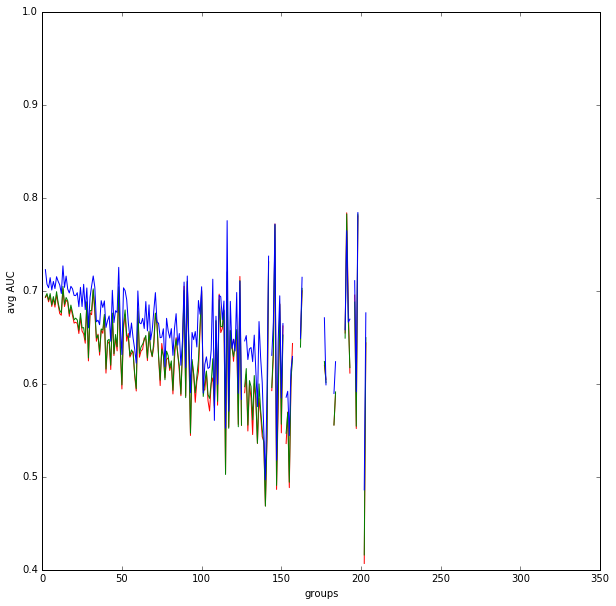

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_ylabel('avg AUC')
ax.set_xlabel('groups')
ax.plot(xrange(len(nosi_results)),nosi_results,'r', xrange(len(si_results)), si_results, 'g', xrange(len(nosi_e200_results)), nosi_e200_results, 'b')

Running the standard model (blue) for 200 epochs is much better though

# split: train 0.2 / test 0.8